In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

dataset = pd.read_csv('anime.csv')

In [165]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [166]:
dataset.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [167]:
print(dataset.isnull().sum())



anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [168]:
dataset = dataset.dropna(axis=0)
print(dataset.isnull().sum()/len(dataset) * 100)


anime_id    0.0
name        0.0
genre       0.0
type        0.0
episodes    0.0
rating      0.0
members     0.0
dtype: float64


In [169]:
dataset['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [170]:
# 애니메이션의 type에 따른 평균 rating은 각각 어떻게 되나요?
average_ratings = dataset.groupby('type')['rating'].mean().reset_index()
print('1번 문제: 평군 rating:')
print(average_ratings)

1번 문제: 평군 rating:
      type    rating
0    Movie  6.334055
1    Music  5.588996
2      ONA  5.650293
3      OVA  6.375411
4  Special  6.523126
5       TV  6.903321


In [176]:
dataset['members'].max()

1013917

In [172]:
correlation = dataset['members'].corr(dataset['rating'])


print(f"2번 문제: members가 많을수록 rating은 증가한 경향을 보인다. Correlation betweenn members and rating: {correlation}")

2번 문제: members가 많을수록 rating은 증가한 경향을 보인다. Correlation betweenn members and rating: 0.3884988570593549


In [177]:
#누락값 채우기
dataset['episodes'] = dataset['episodes'].replace('Unknown', 0)
dataset['episodes'] = dataset['episodes'].astype(int)
dataset['rating'] = dataset['rating'].replace('Unknown', 0)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  int64  
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 751.1+ KB


In [189]:
# dataset['members'].describe()
# dataset['episodes'].describe()
# dataset['rating'].describe()
dataset.describe(include='all')


,anime_id,name,genre,type,episodes,rating,members
count,12017.000000,12017,12017,12017,12017.000000,12017.000000,1.201700e+04
unique,NaN,12015,3229,6,NaN,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,NaN,NaN,NaN
freq,NaN,2,816,3668,NaN,NaN,NaN
mean,13638.001165,NaN,NaN,NaN,12.292419,6.478264,1.834888e+04
std,11231.076675,NaN,NaN,NaN,46.754770,1.023857,5.537250e+04
min,1.000000,NaN,NaN,NaN,0.000000,1.670000,1.200000e+01
25%,3391.000000,NaN,NaN,NaN,1.000000,5.890000,2.250000e+02
50%,9959.000000,NaN,NaN,NaN,2.000000,6.570000,1.552000e+03
75%,23729.000000,NaN,NaN,NaN,12.000000,7.180000,9.588000e+03


In [184]:
dataset.sort_values(by='rating', ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,0,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44


In [186]:
dataset.sort_values(by='members', ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [187]:
dataset.sort_values(by='episodes', ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818,6.18,160
929,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787,7.76,14233
9243,23349,Kirin Monoshiri Yakata,Kids,TV,1565,5.56,116
5360,6277,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471,6.48,406
6580,8213,Hoka Hoka Kazoku,Comedy,TV,1428,6.05,194


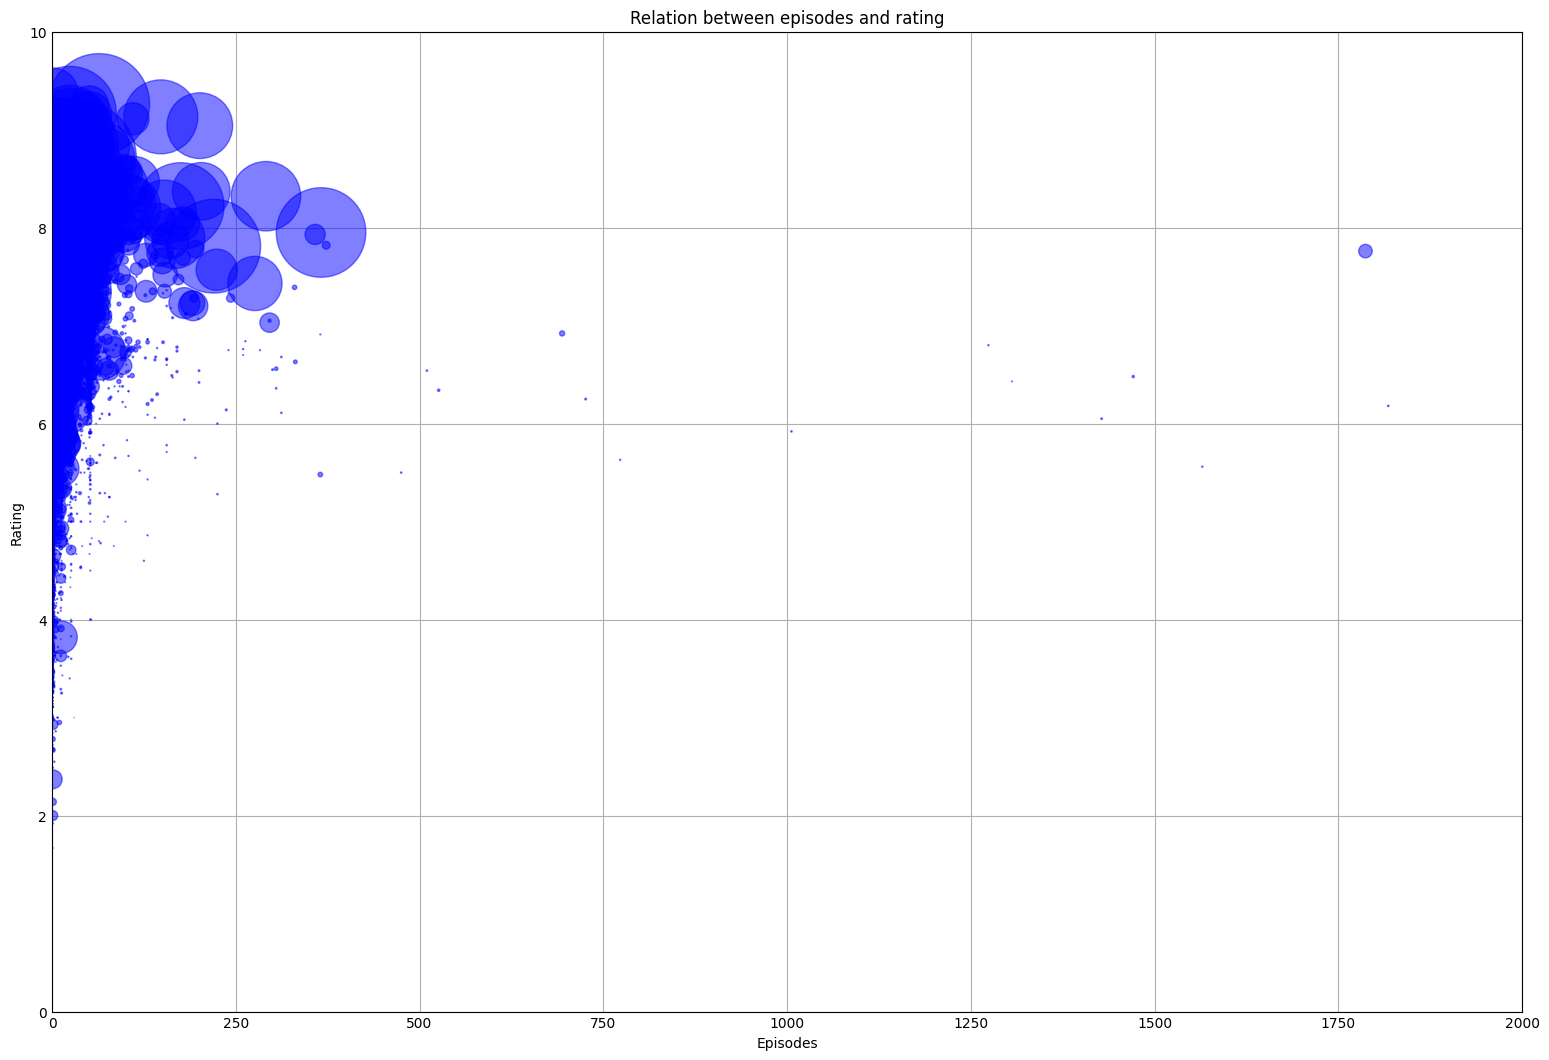

NameError: name 'mistyrose' is not defined

In [175]:
#그래프
#size
fig, ax = plt.subplots(ncols=1, figsize=(15, 10))
#locate max and min
ax.set_xlim(0,2000)
ax.set_ylim(0,10)
#assign data
scale = dataset['members']/150
ax.scatter(x=dataset['episodes'], y=dataset['rating'], alpha=0.5, s = scale, color='blue') 
#label 
ax.set_title("Relation between episodes and rating")  
ax.set_xlabel("Episodes")
ax.set_ylabel("Rating")
#ticker
# ax.set_xticks(np.arange(0, 2000, 250))
# ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.show()

ax.scatter(x=dataset['episodes'], y=dataset['rating'], alpha=0.5, s = scale, color='blue') 


[0.,50695.85,101391.7,152087.55,202783.4]
mistyrose, salmon, tomato, darkred

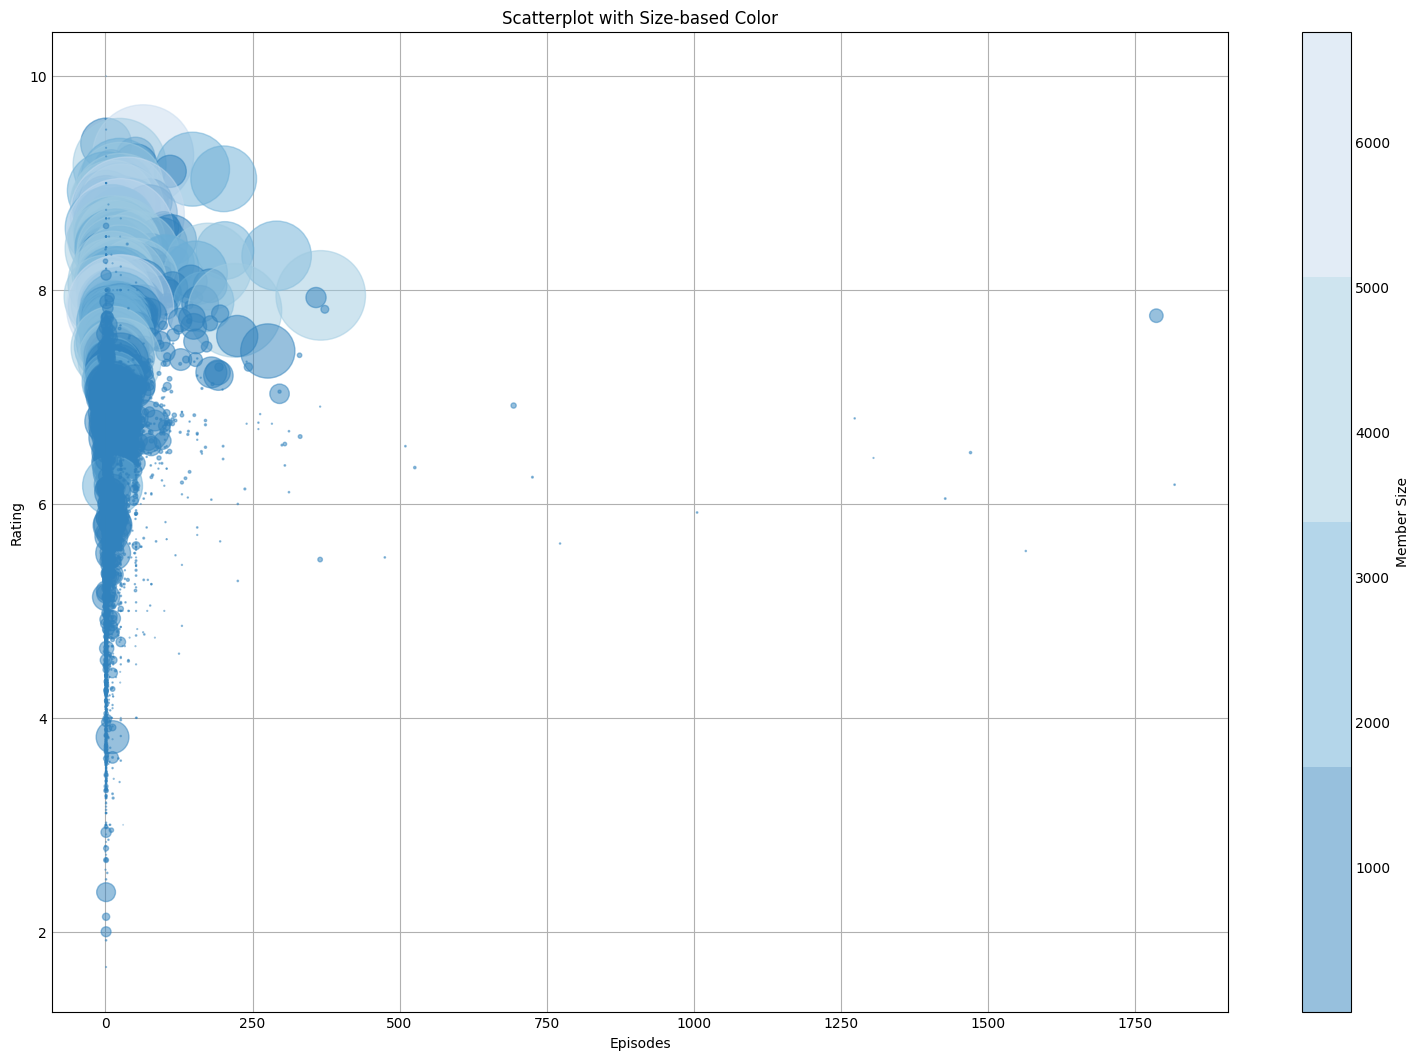

<Figure size 200x200 with 0 Axes>

In [204]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))


x_values = dataset['episodes']
y_values = dataset['rating']
sizes = dataset['members'] / 150


size_intervals = [0., 50695.85, 101391.7, 152087.55, 202783.4]
colors = sns.color_palette('tab20c', n_colors=len(size_intervals) - 1)


cmap = ListedColormap(colors)


scatter = ax.scatter(x=x_values, y=y_values, s=sizes, c=sizes, cmap=cmap, alpha=0.5)


cbar = plt.colorbar(scatter)
cbar.set_label('Member Size')


ax.set_title("Scatterplot with Size-based Color")
ax.set_xlabel("Episodes")
ax.set_ylabel("Rating")

plt.show()

plt.savefig("/Users/User/Desktop/ai challenge 23/animation_scatterplot.png", bbox_inches='tight')

